In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import datasets
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import model_selection
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from rulefit import RuleFit
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from boruta import BorutaPy

#Load Data
a=["date", "Day","Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
b=["Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
c=["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
d=["Appliances"]
df = pd.read_csv("energydata_complete.csv",usecols=a)
df2=  pd.read_csv("energydata_complete.csv",usecols=b)
df1 = df[['date','Day']]
data = df[['Appliances','lights','T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9','T_out','Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',"Tdewpoint",'rv1', 'rv2' ]]
scaler = StandardScaler()
scaler.fit(data)
#print()
#print(scaler.data_max_)
data_trans = scaler.transform(data)
df2.loc[:,:]=data_trans
df2.head()
df = pd.concat([df1, df2], axis=1)
df.head()
del a[0]
del a[0]
df["date1"]= ((df['date'].str.split(" ").str[0]))
df.head()

C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,date,Day,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,date1
0,2016-01-11 17:00:00,Monday,-0.367676,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,...,0.958136,-0.152788,-2.976328,0.82208,1.207694,2.091596,0.366854,-0.807974,-0.807974,2016-01-11
1,2016-01-11 17:10:00,Monday,-0.367676,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,...,0.965363,-0.175352,-2.962813,0.82208,1.071703,1.766584,0.343017,-0.440240,-0.440240,2016-01-11
2,2016-01-11 17:20:00,Monday,-0.465215,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,...,0.950910,-0.196035,-2.949298,0.82208,0.935713,1.441572,0.319180,0.252109,0.252109,2016-01-11
3,2016-01-11 17:30:00,Monday,-0.465215,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,...,0.926821,-0.218599,-2.935783,0.82208,0.799723,1.116559,0.295343,1.408801,1.408801,2016-01-11
4,2016-01-11 17:40:00,Monday,-0.367676,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,...,0.926821,-0.241162,-2.922268,0.82208,0.663733,0.791547,0.271506,-1.028122,-1.028122,2016-01-11


In [2]:
y=df['Appliances']
X=df[["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]]

In [3]:
def greedy_elim():

    # do feature selection using boruta
    model = RandomForestRegressor(n_jobs= 4,oob_score= True)
    #model = LinearRegression()
    # define Boruta feature selection method
   # feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

    # find all relevant features - 5 features should be selected
    #feat_selector.fit(X, y)
    # 150 features seems to be the best at the moment. Why this is is unclear.
    feat_selector = BorutaPy(estimator=model, n_estimators='auto', verbose=2, random_state=1)

    # find all relevant features
    feat_selector.fit_transform(X.as_matrix(), y.as_matrix())

    # check selected features
    features_bool = np.array(feat_selector.support_)
    print (features_bool)
    features = np.array(X.columns)
    print (features)
    result = features[features_bool]
    print(result)

    # check ranking of features
    features_rank = feat_selector.ranking_
    #print(features_rank)
    rank = features_rank[features_bool]
    #print(rank)
   
    

    return result 

In [4]:
greedy_elim()

C:\Users\Shilpu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	23
Tentative: 	0
Rejected: 	4


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	23
Tentative: 	0
Rejected: 	4
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True False
  True False F

array(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Tdewpoint'],
      dtype=object)

In [5]:
X=df[['lights','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','Press_mm_hg','RH_out','Windspeed','Tdewpoint']]
y=df['Appliances']

R-Squared Value: 0.16
MAE: 0.5242860586162524
MSE: 0.8721276559103536
RMSE: 0.9338777521230247


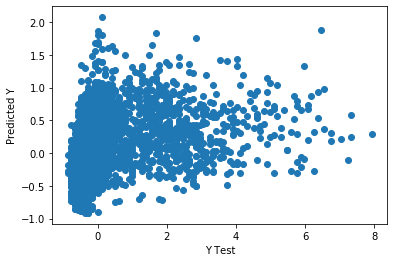

R-Squared Value: 0.11
MAE: 0.5118540278248688
MSE: 0.8379892215450134
RMSE: 0.9154175121467872


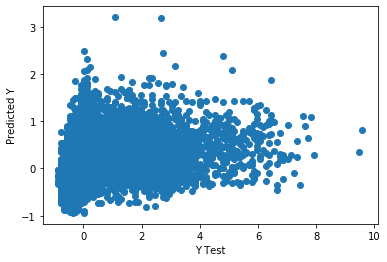

R-Squared Value: 0.16
MAE: 0.5118540278248688
MSE: 0.8379892215450134
RMSE: 0.9154175121467872


Text(0, 0.5, 'Predicted Y')

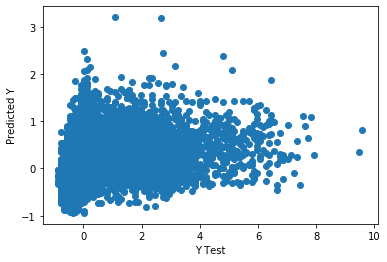

In [6]:
#Validation using Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R-Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R-Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = LinearRegression()
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R-Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R Squared Value: 1.00
MAE: 0.37801499534827543
MSE: 0.8067186487130259
RMSE: 0.8981751770746205


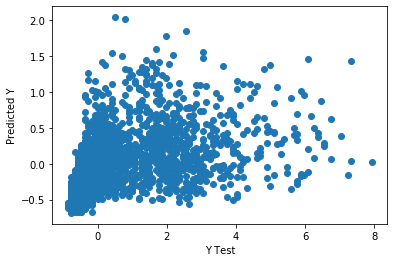

R Squared Value: 0.10
MAE: 0.35438841853335545
MSE: 0.7525974516726862
RMSE: 0.8675237470367518


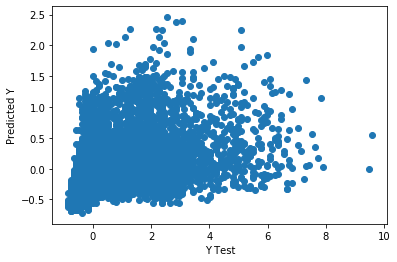

R Squared Value: 0.23
MAE: 0.35438841853335545
MSE: 0.7525974516726862
RMSE: 0.8675237470367518


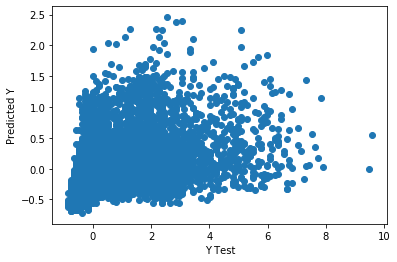

In [7]:
#Validation using Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, predictions)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = SVR(kernel='rbf')
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = SVR(kernel='rbf')
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.13
MAE: 0.4069290977124537
MSE: 0.901759285045738
RMSE: 0.9496100700001754


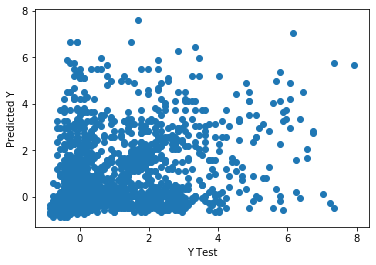

R Squared Value: -2.25
MAE: 0.12208903914646259
MSE: 0.27055063221463466
RMSE: 0.5201448185021501


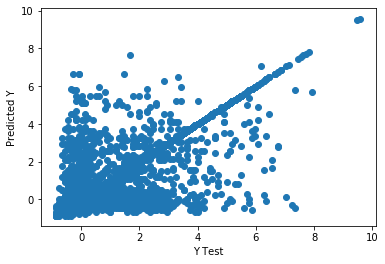

CV Scores:
R Squared Value: 0.10
MAE: 0.12208903914646259
MSE: 0.27055063221463466
RMSE: 0.5201448185021501


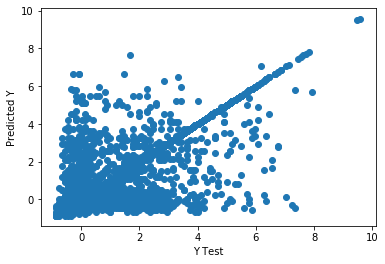

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = DecisionTreeRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = DecisionTreeRegressor()
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("CV Scores:" % (results_4))
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

RMSE value for k=  1 is: 0.8335719091707746
RMSE value for k=  2 is: 0.7535435691327583
RMSE value for k=  3 is: 0.7658198598834063
RMSE value for k=  4 is: 0.768256401671842
RMSE value for k=  5 is: 0.7723397822884527
RMSE value for k=  6 is: 0.7735719346876129
RMSE value for k=  7 is: 0.78318215021385
RMSE value for k=  8 is: 0.7867054289294427
RMSE value for k=  9 is: 0.7902242894192876
RMSE value for k=  10 is: 0.7940755168357685
RMSE value for k=  11 is: 0.798933125595175
RMSE value for k=  12 is: 0.8027675191441015
RMSE value for k=  13 is: 0.8036853981727152
RMSE value for k=  14 is: 0.8056237125427899
RMSE value for k=  15 is: 0.8083962881097628
RMSE value for k=  16 is: 0.8108086650340056
RMSE value for k=  17 is: 0.8162000794968897
RMSE value for k=  18 is: 0.8200899939150782
RMSE value for k=  19 is: 0.8219258319692161
RMSE value for k=  20 is: 0.8249879615031397


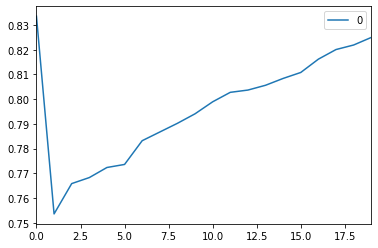

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

R Squared Value: 0.43
MAE: 0.3443626369759993
MSE: 0.5864800577918401
RMSE: 0.7658198598834063


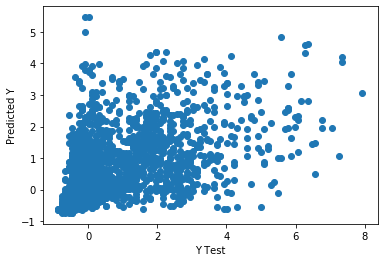

R Squared Value: -0.56
MAE: 0.25085865818846537
MSE: 0.3443509540398015
RMSE: 0.5868142415107199


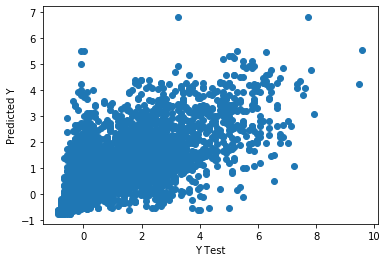

CV Scores
R Squared Value: 0.44
MAE: 0.25085865818846537
MSE: 0.3443509540398015
RMSE: 0.5868142415107199


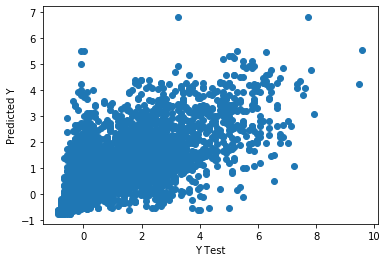

In [10]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = neighbors.KNeighborsRegressor(n_neighbors = 3)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = neighbors.KNeighborsRegressor(n_neighbors = 3)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("CV Scores" % (results_4))
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.25
MAE: 0.47594749621092586
MSE: 0.7769351715946894
RMSE: 0.8814392614325104


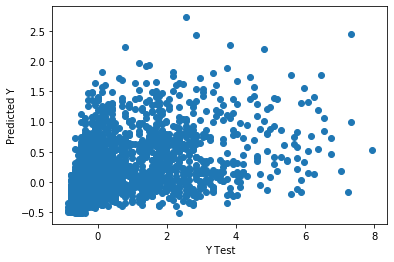

R Squared Value: 0.01
MAE: 0.4457003503348155
MSE: 0.6695124968747098
RMSE: 0.8182374330686111


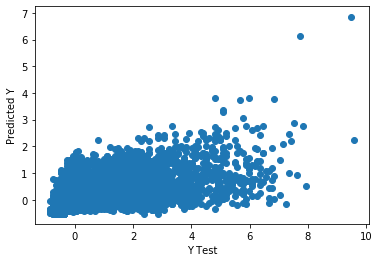

R Squared Value: 0.26
MAE: 0.4457003503348155
MSE: 0.6695124968747098
RMSE: 0.8182374330686111


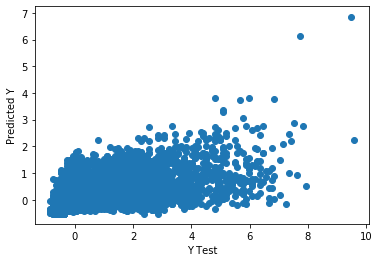

In [11]:
params={'n_estimators':500,'max_depth':4,'min_samples_split':2,
        'learning_rate':0.01,'loss':'ls'}

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = ensemble.GradientBoostingRegressor(**params)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = ensemble.GradientBoostingRegressor(**params)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.51
MAE: 0.33891068981600686
MSE: 0.5113137039643193
RMSE: 0.7150620280537342


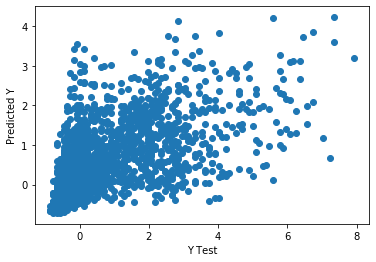

R Squared Value: -0.30
MAE: 0.18550746942386187
MSE: 0.19915920018430902
RMSE: 0.4462725626613281


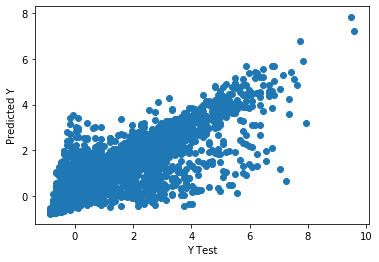

R Squared Value: 0.51
MAE: 0.18550746942386187
MSE: 0.19915920018430902
RMSE: 0.4462725626613281


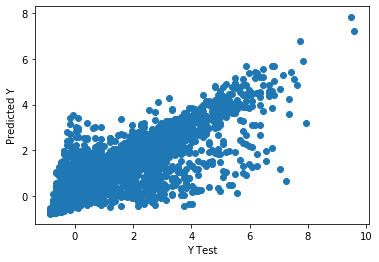

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.49
MAE: 0.35106275043327434
MSE: 0.5302772673271691
RMSE: 0.7282013920112822


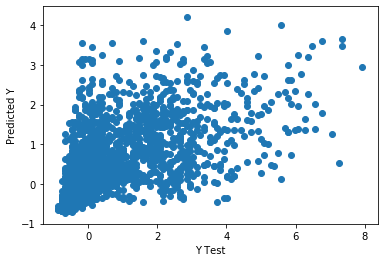

R Squared Value: -0.31
MAE: 0.19299177168184847
MSE: 0.20854840331102037
RMSE: 0.456671001171544


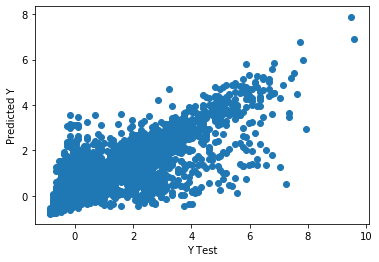

[0.48849821 0.48905196 0.51485212 0.47655229 0.47013013 0.49911128
 0.52119883 0.47452764 0.5064809  0.50521647]
R Squared Value: 0.49
MAE: 0.19299177168184847
MSE: 0.20854840331102037
RMSE: 0.456671001171544


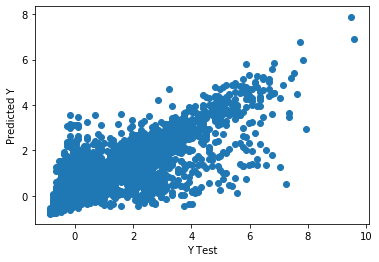

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = RandomForestRegressor(n_estimators = 100, random_state = 0)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = RandomForestRegressor(n_estimators = 100, random_state = 0)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print(results_4)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [17]:
y=df['Appliances'].values
X=df[["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]].values
#Validation using Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
rf = RuleFit()
rf.fit(X_train, y_train)
predictions=rf.predict(X_test)
rules = rf.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)
print(rules)

C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


                                                   rule    type      coef  \
1                                             feature_1  linear -0.116172   
15                                           feature_15  linear  0.136284   
3                                             feature_3  linear -0.171491   
24                                           feature_24  linear -0.029113   
23                                           feature_23  linear -0.010486   
20                                           feature_20  linear  0.049506   
17                                           feature_17  linear  0.084544   
25                                           feature_25  linear -0.009220   
14                                           feature_14  linear  0.007139   
13                                           feature_13  linear -0.011410   
11                                           feature_11  linear  0.084371   
7                                             feature_7  linear -0.031873   

R Squared Value: 0.49
MAE: 0.4799145080669977
MSE: 0.7513388835367517
RMSE: 0.866798063874598


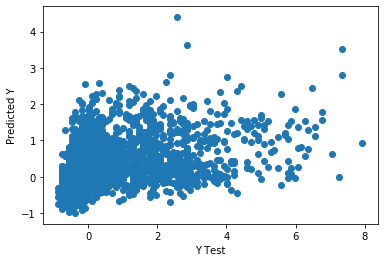

In [18]:
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()